# 1절 분류분석 개요
## 1-1 분류분석이란?
- 타겟변수가 categorical인 분석
    * ex. 고객등급예측, 휴면고객예측, 상품구매예측, 보험사기자예측
    * 수업ex. mnist 숫자데이터 분류, iris분류 예측, 와인등급예측, 질병예측
- sklearning 패키지 : 머신러닝 모형, 예제 데이터셋, 전처리, 머신러닝 등의 제공

## 1-2 샘플용 데이터 셋 접근
### load 계열(패키지 내에 데이터 있음)
    - load_iris()m load_boston(), load_diabetes()...

### fetch계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
    - fetch_openml(), fetch_rov1(로이터뉴스 말뭉치)
### make 계열(가상의 데이터 생성)
    - make_classification() : 분류분석용 데이터 생성
    - make_regression() : 회귀분석용 데이터 생성
    - make_blobs() : 군집분석용 데이터 생성(타겟변수x)


In [4]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# mnist load
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'label : 5')

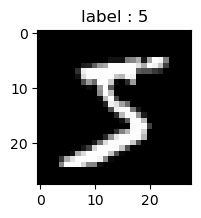

In [9]:
# 첫번째 이미지 출력
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap='gray')
plt.title('label : ' + str(y_train[0]))

In [32]:
# fetch계열(패키지 내에 데이터가 없고, 인터넷 연결시 다운)
from sklearn.datasets import fetch_openml
# mnist fetch : mnist, iris, boston, fashion-mnist
mnist = fetch_openml(name='mnist_784', version=1, as_frame=False, parser='auto')
X, y= mnist.data, mnist.target.astype('int')
X.shape, y.shape

((70000, 784), (70000,))

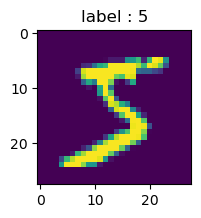

In [33]:
X = X.reshape(-1,28,28)
plt.figure(figsize=(2,2))
plt.imshow(X[0])
plt.title('label : ' + str(y[0]))
plt.show()

# 2절 분류분석의 종류
- predict()
## 2-1 확률적 모형
    - 주어진 데이터에 각 클래스가 정답일 확률을 계산하는 모형
    - predict_proba() : 각 분류 클래스별 확률을 알려줌(일부의 판별함수 모형에 있긴 함)
    - predict_log_proba() : 확률의 로그값 알려줌
### 1) 확률적 생성 모형
    - 각 클래스별 특징 데이터 확률분포 추정(베이즈 정리를 사용). 소량의 데이터로도 작동
    - ex. Quadratic Discriminant Analysis, 나이브 베이지안
### 2) 확률적 판별 모형
    - 확률을 계산하는 함수 이용
    - ex. 의사결정나무, 로지스틱 회귀

## 2-2 판별함수 모형
    - 주어진 데이터를 클래스에 따라 어떤 영역으로 나눠지는 경계면을 찾는 함수
    - 이 걍계면으로부터 어느 위치에 있는지를 계산하는 판별함수를 이용
    - decision_function()
    - ex. 퍼셉트론, 서포트벡터머신, MLP(신경망)

=> RandomFroest, LGBM, XGBoost, CatBoost등의 앙상블 모형이 더 많이 쓰인다

# 3절 분류모형1. 확률적 생성 모형
- 베이즈 정리를 사용하여 확률분포 계산

## 3-1 QDA(Quadratic Discriminant Analysis)
- X가 연속형(실수) 이면서 정규분포라고 가정함

In [40]:
# 샘플 데이터
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2,    # 독립변수 갯수
                           n_informative=2, # 타겟변수에 영향을 주는 독립변수 갯수
                           n_redundant=0,   # 타겟변수에 영향을 안 주는 독립변수
                           n_clusters_per_class=1, # 클래스 내 서브그룹수
                           n_classes=2,     # 타겟변수 class 수
                           n_samples=100    # 데이터 갯수
                           )
X.shape, y.shape

((100, 2), (100,))

In [43]:
import numpy as np
np.unique(y)

array([0, 1])

In [44]:
y.mean()

0.5

In [47]:
X[y==1]

array([[-1.51689503, -0.38971047],
       [-1.23578277, -0.64933482],
       [-1.77659302,  0.09015877],
       [-0.36070999, -1.84944869],
       [-1.29289481, -0.63001888],
       [-0.69990632, -1.41010365],
       [-1.01225697, -0.91689968],
       [-0.53506343, -1.64237966],
       [-1.47184561, -0.38470286],
       [-1.33903209, -0.50415056],
       [-1.38839598, -0.41642465],
       [-1.10101221, -0.83345877],
       [-0.99339999, -1.03968601],
       [-1.3190422 , -0.54369979],
       [-1.147224  , -0.81563147],
       [-1.33255804, -0.52205539],
       [-1.17428799, -0.76289132],
       [-0.83525907, -1.26461232],
       [-0.74282007, -1.35428132],
       [-1.50710618, -0.30065785],
       [-0.96714007, -1.02333397],
       [-1.09287507, -0.86528377],
       [-0.83935933, -1.16162401],
       [-0.74114053, -1.32266005],
       [-0.93520394, -1.06175898],
       [-1.41796562, -0.4740582 ],
       [-0.5541217 , -1.51984067],
       [-0.52795506, -1.58076949],
       [-0.63483435,

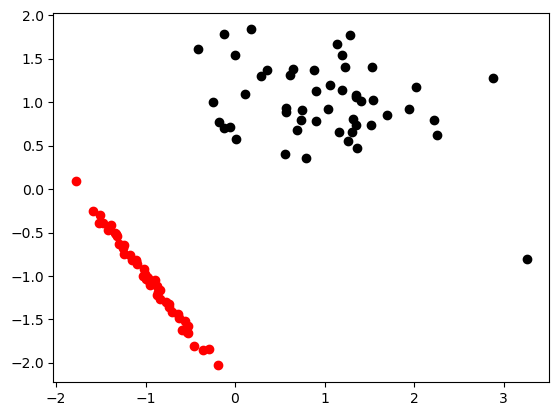

In [54]:
import matplotlib.pyplot as plt
plt.scatter(X[y==0,0], X[y==0,1], c='k')
plt.scatter(X[y==1,0], X[y==1,1], c='r')

In [57]:
# (0,0) 대칭구조
X[y==1] = -X[y==0]

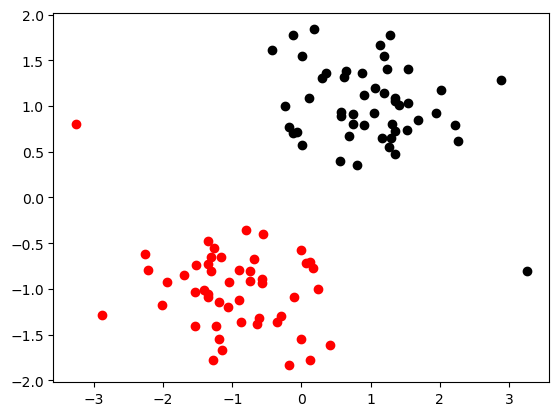

In [58]:
plt.scatter(X[y==0,0], X[y==0,1], c='k')
plt.scatter(X[y==1,0], X[y==1,1], c='r')

In [60]:
# QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X,y)

QuadraticDiscriminantAnalysis()

In [75]:
x = [[1,0]]
model.predict(x)[0]

0

In [76]:
p = model.predict_proba(x)
print(p) # 0으로 분류될 확률, 1로 분류될 확률

[[0.99698295 0.00301705]]


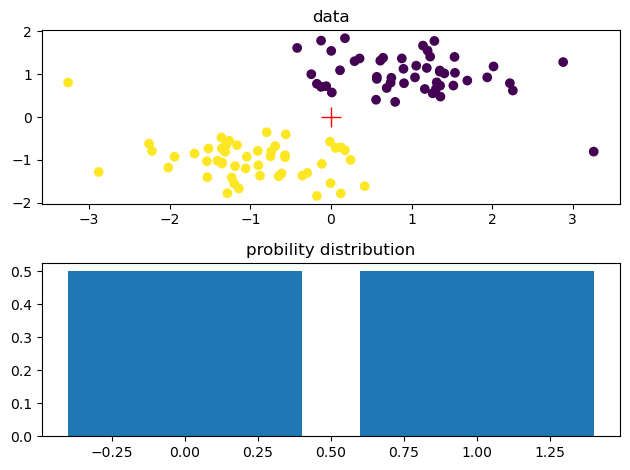

In [101]:
x = [[0,0]]
p = model.predict_proba(x)
plt.subplot(211) # 2행 1열로 plt 그래프 중 첫번째 그래프 (2, 1, 1)
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.scatter(x=x[0][0], y=x[0][1], c='r', s=200, marker='+', lw=1)
plt.title('data')
plt.subplot(212) # 2행 1열로 plt 그래프 중 두번째 그래프 (2, 1, 1)
plt.bar(model.classes_, p[0])
plt.title('probility distribution')
plt.tight_layout()

## 3-2 나이브베이지안 모형

In [113]:
# 데이터
import seaborn as sns
iris = sns.load_dataset('iris')
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1] # 범주형(문자) - 라벤인코딩 없이 적용
# 모형생성
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X,y)

MultinomialNB()

In [116]:
test_x = np.array([[5.1,3.5,1.4,0.2]]) # X.loc[0]
print('test_x의 예측 :', model.predict(test_x))
print(model.classes_)
print(model.predict_proba(test_x))

test_x의 예측 : ['setosa']
['setosa' 'versicolor' 'virginica']
[[0.75199536 0.16092948 0.08707516]]


c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
c:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


<BarContainer object of 3 artists>

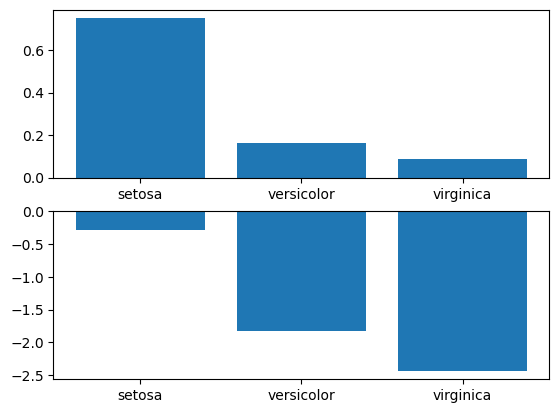

In [ ]:
test_x = np.array([[5.1,3.5,1.4,0.2]])
plt.subplot(2,1,1)
plt.bar(model.classes_, model.predict_proba(test_x)[0])
plt.subplot(2,1,2)
plt.bar(model.classes_, model.predict_log_proba(test_x)[0]) # 차이값을 비교하기 위해 로그를 적용

# 4절 분류모형2. 확률적 판별모형
## 4-1 로지스틱 회귀분석

In [131]:
# 데이터
X, y = make_classification(n_features=1,
                           n_redundant=0,
                           n_informative=1,
                           n_classes=2,
                           n_clusters_per_class=1,
                           n_samples=100
                           )
X.shape, y.shape

((100, 1), (100,))

In [132]:
np.unique(y), y.mean()

(array([0, 1]), 0.5)

In [138]:
# 모형
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(X,y)

In [ ]:
import numpy as np
xx = np.linspace(-3, 3, 100) # -3 부터 3까지 같은 간격의 데이터 100개
test_x = xx.reshape(-1,1) # xx의 행 축 증가
test_x = xx[:,np.newaxis]
test_x = np.expand_dims(xx, axis=1)
y_hat = model.predict(test_x)
prob = model.predict_proba(test_x)
prob1 = prob[:,1] # 1로 분류될 확률
prob0 = prob[:,0] # 2로 분류될 확률

<BarContainer object of 2 artists>

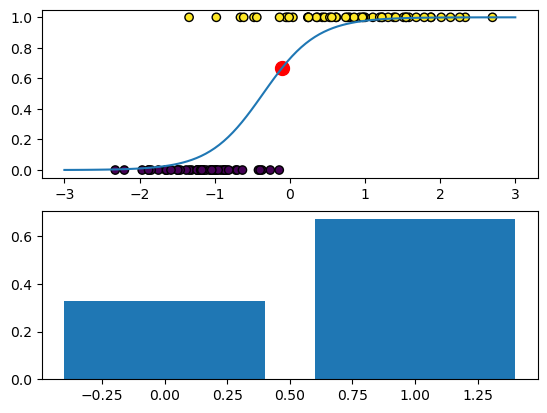

In [166]:
plt.subplot(211)
x = [[-0.1]]
prob_x = model.predict_proba(x)
plt.scatter(X,y,c=y, edgecolors='k')
plt.plot(xx, prob1)
plt.scatter(x[0][0], prob_x[0][1], c='r', s=100)
plt.subplot(212)
plt.bar(model.classes_, prob_x[0])

## 4.2 의사결정나무
- **종속변수에 영향을 주는 독립변수의 범주를 찾는 목적**

In [2]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data[:, 2:] # petal length,width 만 갖고오기
y = data.target
feature_names = [name[:-5] for name in data.feature_names[2:]]
print(feature_names)

from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='entropy',
                                  max_depth=1,
                                  random_state=0)
dt_model.fit(X,y)                                  


test_x = [X[120]]
print(test_x[0])
print('예측값 :',dt_model.predict(test_x))
print(dt_model.classes_)
print(dt_model.predict_proba(test_x))

['petal length', 'petal width']
[5.7 2.3]
예측값 : [1]
[0 1 2]
[[0.  0.5 0.5]]


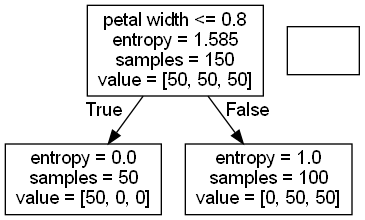

In [6]:
# 분류모형의 시각화
import io
from sklearn.tree import export_graphviz
import pydot
from IPython.core.display import Image

def draw_decision_tree(model, feature_names):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(dt_model, feature_names=feature_names)

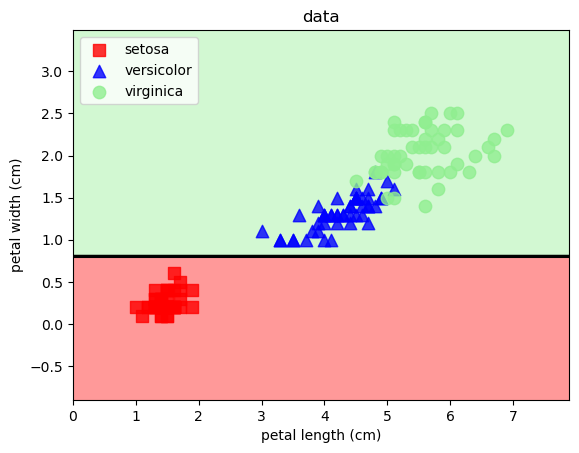

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
def plot_decision_regions(X, y, model, title):
    species = ['setosa', 'versicolor', 'virginica']
    resolution = 0.01
    markers = ('s', '^', 'o')
    colors = ('red', 'blue', 'lightgreen')
    cmap = mpl.colors.ListedColormap(colors)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = model.predict(
    np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    plt.contour(xx1, xx2, Z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8,
            c=[cmap(idx)], marker=markers[idx], s=80, label=species[cl])
    plt.xlabel(data.feature_names[2])
    plt.ylabel(data.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)
    return Z

plot_decision_regions(X,y,dt_model,'data')
plt.show()

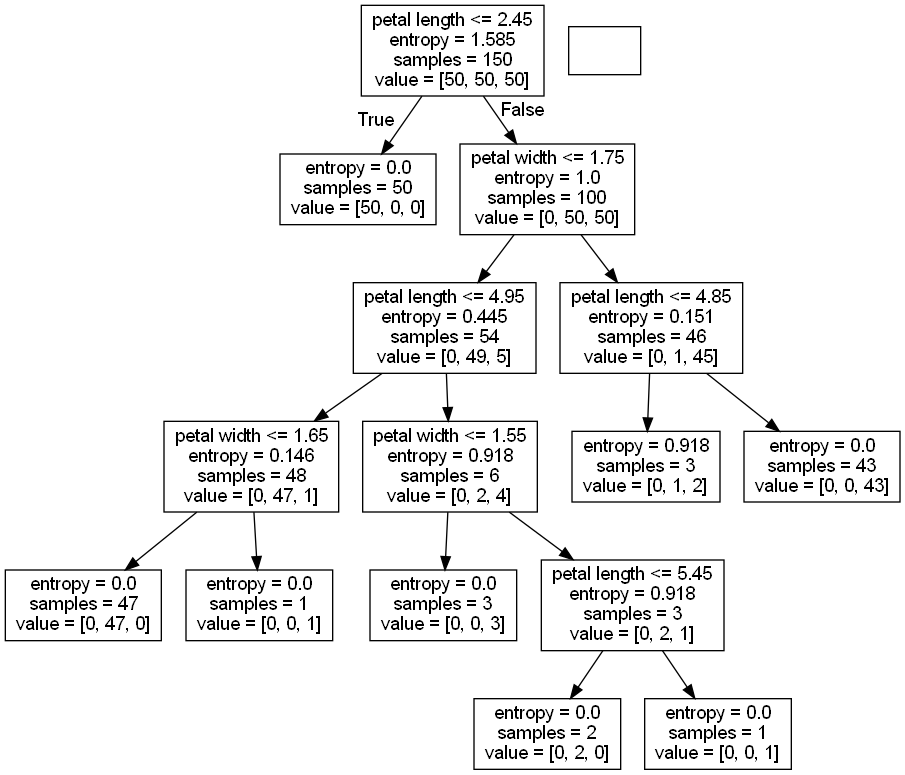

In [9]:
dt_model5 = DecisionTreeClassifier(criterion='entropy',
                                   max_depth=5)
dt_model5.fit(X,y)                                   
draw_decision_tree(dt_model5, feature_names=feature_names)

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

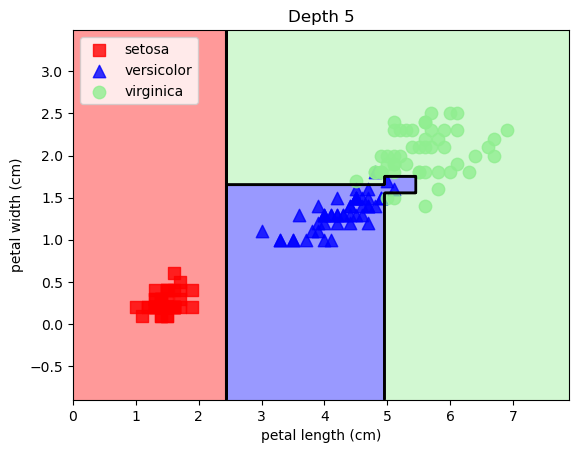

In [10]:
plot_decision_regions(X,y, dt_model5, 'Depth 5')

In [11]:
pred = dt_model5.predict(X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# 5절 분류분석모형3. 판별함수 모형
- SVM, 퍼셉트론, MLP, ...
- predict_prob 대신 decision_function()

## 5.1 SVM의 SVC

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
idx = pd.Series(iris.target).isin([0,2])

In [5]:
X = iris.data[idx]
y = iris.target[idx]

In [8]:
from sklearn.svm import SVC
model = SVC()
model.fit(X,y)

SVC()

In [10]:
y_hat = model.predict(X)
pd.crosstab(y, y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [22]:
X[0]
x = [X[0].tolist()]
model.decision_function(x)

array([-1.14828042])

## 5.2 퍼셉트론

In [ ]:
from sklearn.linear_model import Perceptron
model = Perceptron(max_iter=100, # 학습횟수 epoch 100회
                   eta0=0.1      # learning rate
                   ).fit(X,y)                   

In [26]:
y_hat = model.predict(X)
pd.crosstab(y,y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


In [32]:
pred = model.predict(x)
df   = model.decision_function(x)
print('예측값 :',pred)
print('판별함수 결과 :',df)

예측값 : [0]
판별함수 결과 : [-1.809]


## 5.3 다중퍼셉트론(인공신경망)
- predict/ decision_function / preduct_proba / predict_log_proba

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,50,30),
                    max_iter=500,
                    activation='relu')

mlp.fit(X,y)
y_hat = model.predict(X)
pd.crosstab(y,y_hat)

col_0,0,2
row_0,,
0,50,0
2,0,50


# 6절. 분류모형 성능평가
- 혼동행렬(교차표)
- score함수 : accuracy, recall, precision, f1_score, fbeta_score
- ROC 커브 -> roc커브 영역 확인
- EX. 두 모형이 혼동행렬이 같은 경우

## 6-1 혼동행렬(교차표)

In [36]:
y_true = [1, 1, 0, 0, 2, 1, 0, 2, 2] # 실제값
y_pred = [1, 1, 0, 1, 1, 0, 0, 2, 1] # 예측값 
# 혼동행렬
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]], dtype=int64)

In [40]:
# 교차표
pd.crosstab(y_true, y_pred, colnames=['예측값'], rownames=['실제값'])

예측값,0,1,2
실제값,,,
0,2,1,0
1,1,2,0
2,0,2,1


## 6-2  혼동행렬을 이용한 평가
- 각종 score() 함수 

In [49]:
result = pd.read_csv('data/model_result.csv') # 보험사기자 예측 실제값과 예측값
result.sample(3)

,CUST_ID,y_true,y_pred
420,5027,0,0
891,10930,1,1
1254,15753,0,0


In [50]:
result.isnull().sum() # 결측치 갯수

CUST_ID    0
y_true     0
y_pred     0
dtype: int64

In [51]:
result.shape

(1793, 3)

In [53]:
result['y_true'].value_counts()

0    1635
1     158
Name: y_true, dtype: int64

In [54]:
pd.crosstab(result.y_true, result.y_pred, margins=True, colnames=['예측값'],rownames=['실제값'])

예측값,0,1,All
실제값,,,
0,1613,22,1635
1,81,77,158
All,1694,99,1793


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, fbeta_score
# 정확도 : 전체 중에서 맞게 예측한 확률
accuracy_score(result.y_true, result.y_pred)

0.9425543781372002

In [56]:
# 정밀도(precision) : positive로 예측한 것 중에 맞게 예측한 확률
precision_score(result.y_true, result.y_pred)

0.7777777777777778

In [57]:
# 재현율(recall) : 실제 positive 중 맞게 예측한 확률
recall_score(result.y_true, result.y_pred)

0.4873417721518987

In [60]:
# 특이도(specificity) : 실제 negative 중 맞게 예측한 확률
recall_score(result.y_true, result.y_pred, pos_label=0)

0.9865443425076452

In [ ]:
# 위양성율(fprate) : FN / (TN+FP) : 실제 negative인데 positive로 예측한 확률
# 함수 없음

In [ ]:
# f1 score : recall과 precision 조화평균
f1_score(result.y_true, result.y_pred)

0.5992217898832685

In [ ]:
# beta=1 : f1_score - recall과 precision의 비중을 같게
fbeta_score(result.y_true, result.y_pred, beta=1)

0.5992217898832685

In [67]:
# beta=2 : f1_score - recall의 가중치를 높게 precision의 비중을 낮게
fbeta_score(result.y_true, result.y_pred, beta=2)

0.5266757865937073

## 6-3 ROC커브를 이용한 성능 비교
- ROC그래프의 가로축 위양성율(fprate : False Positive rate), 세로축 recall값

In [69]:
from sklearn.datasets import make_classification
X, y = make_classification(weights=[0.95,0.05], 
                           n_samples=1000,
                           )
X.shape, y.shape

((1000, 20), (1000,))

In [73]:
import numpy as np
np.unique(y), y.mean()

(array([0, 1]), 0.052)

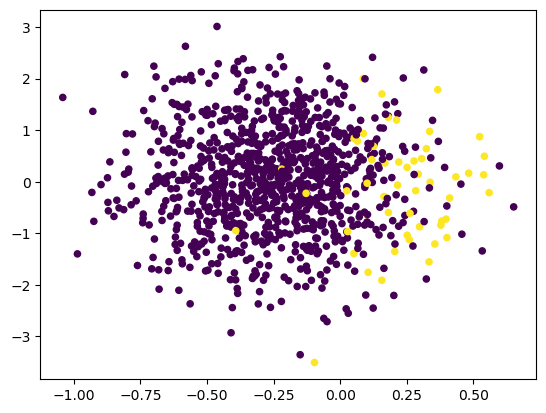

In [79]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1], c=y, s=20)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

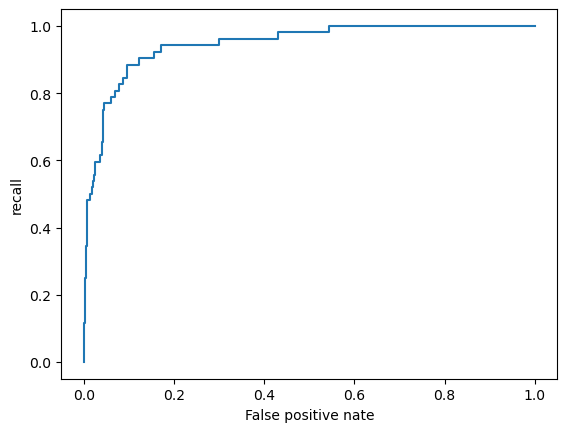

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr, thr = roc_curve(y, model.decision_function(X))
plt.plot(fpr,tpr)
plt.xlabel('False positive nate')
plt.ylabel('recall')
plt.show()

## 6-4 두 모형의 혼동행열리 같은 경우(roc_curve사용)

In [95]:
from sklearn.datasets import make_classification
X, y = make_classification(weights=[0.95,0.05], 
                           n_samples=1000,
                           random_state=5
                           )
X.shape, y.shape

((1000, 20), (1000,))

In [103]:
from sklearn.svm import SVC
model1 = LogisticRegression().fit(X,y)
model2 = SVC(
    gamma=0.0001,
    C = 3000,
    probability=True
).fit(X,y)

In [ ]:
y_hat1 = model1.predict(X)
y_hat2 = model2.predict(X)

In [109]:
pd.crosstab(y,y_hat2)
display(pd.crosstab(y,y_hat1))
display(pd.crosstab(y,y_hat2))

col_0,0,1
row_0,,
0,940,3
1,30,27


col_0,0,1
row_0,,
0,940,3
1,30,27


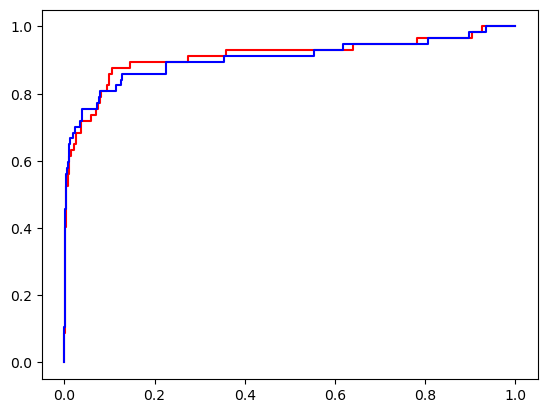

In [117]:
# 혼돈 행령이 같으므로 모든 score 값이 같음
# roc 커브로 성능비교
fpr1, tpr1, th1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, th2 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, color='r')
plt.plot(fpr2, tpr2, color='b')

In [ ]:
# AUC(Area Under Curve) : roc커브 아랫 부분의 영역
# AUC = 1: 완벽한 모델
# AUC < 0.5 : 최악의 모델
# AUC = 0.5 : 완전 랜덤이다 그냥
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9112202563673234, 0.9037227214377407)

# 7절 연습문제

In [125]:
df = pd.read_csv('data/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
